# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [145]:
# install jupyterthemes
#!{sys.executable} -m pip install jupyterthemes

# upgrade to latest version
#!{sys.executable} -m pip install --upgrade jupyterthemes

In [146]:
import tensorflow as tf
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.express as px # Interactive Data Visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
import cufflinks as cf # Works as a connector between the pandas library and plotly
cf.go_offline() 
init_notebook_mode(connected=True) # To connect Jupyter notebook with JavaScript
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme= 'monokai', context= 'notebook', ticks= True, grid= False)

In [147]:
# Read the CSV file 
telecom_df = pd.read_csv('telecom_churn.csv')

In [148]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [149]:
# Load the bottom 5 instances 
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [150]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [151]:
# Obtain the summary of the dataframe
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [152]:
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# PERFORM DATA VISUALIZATION

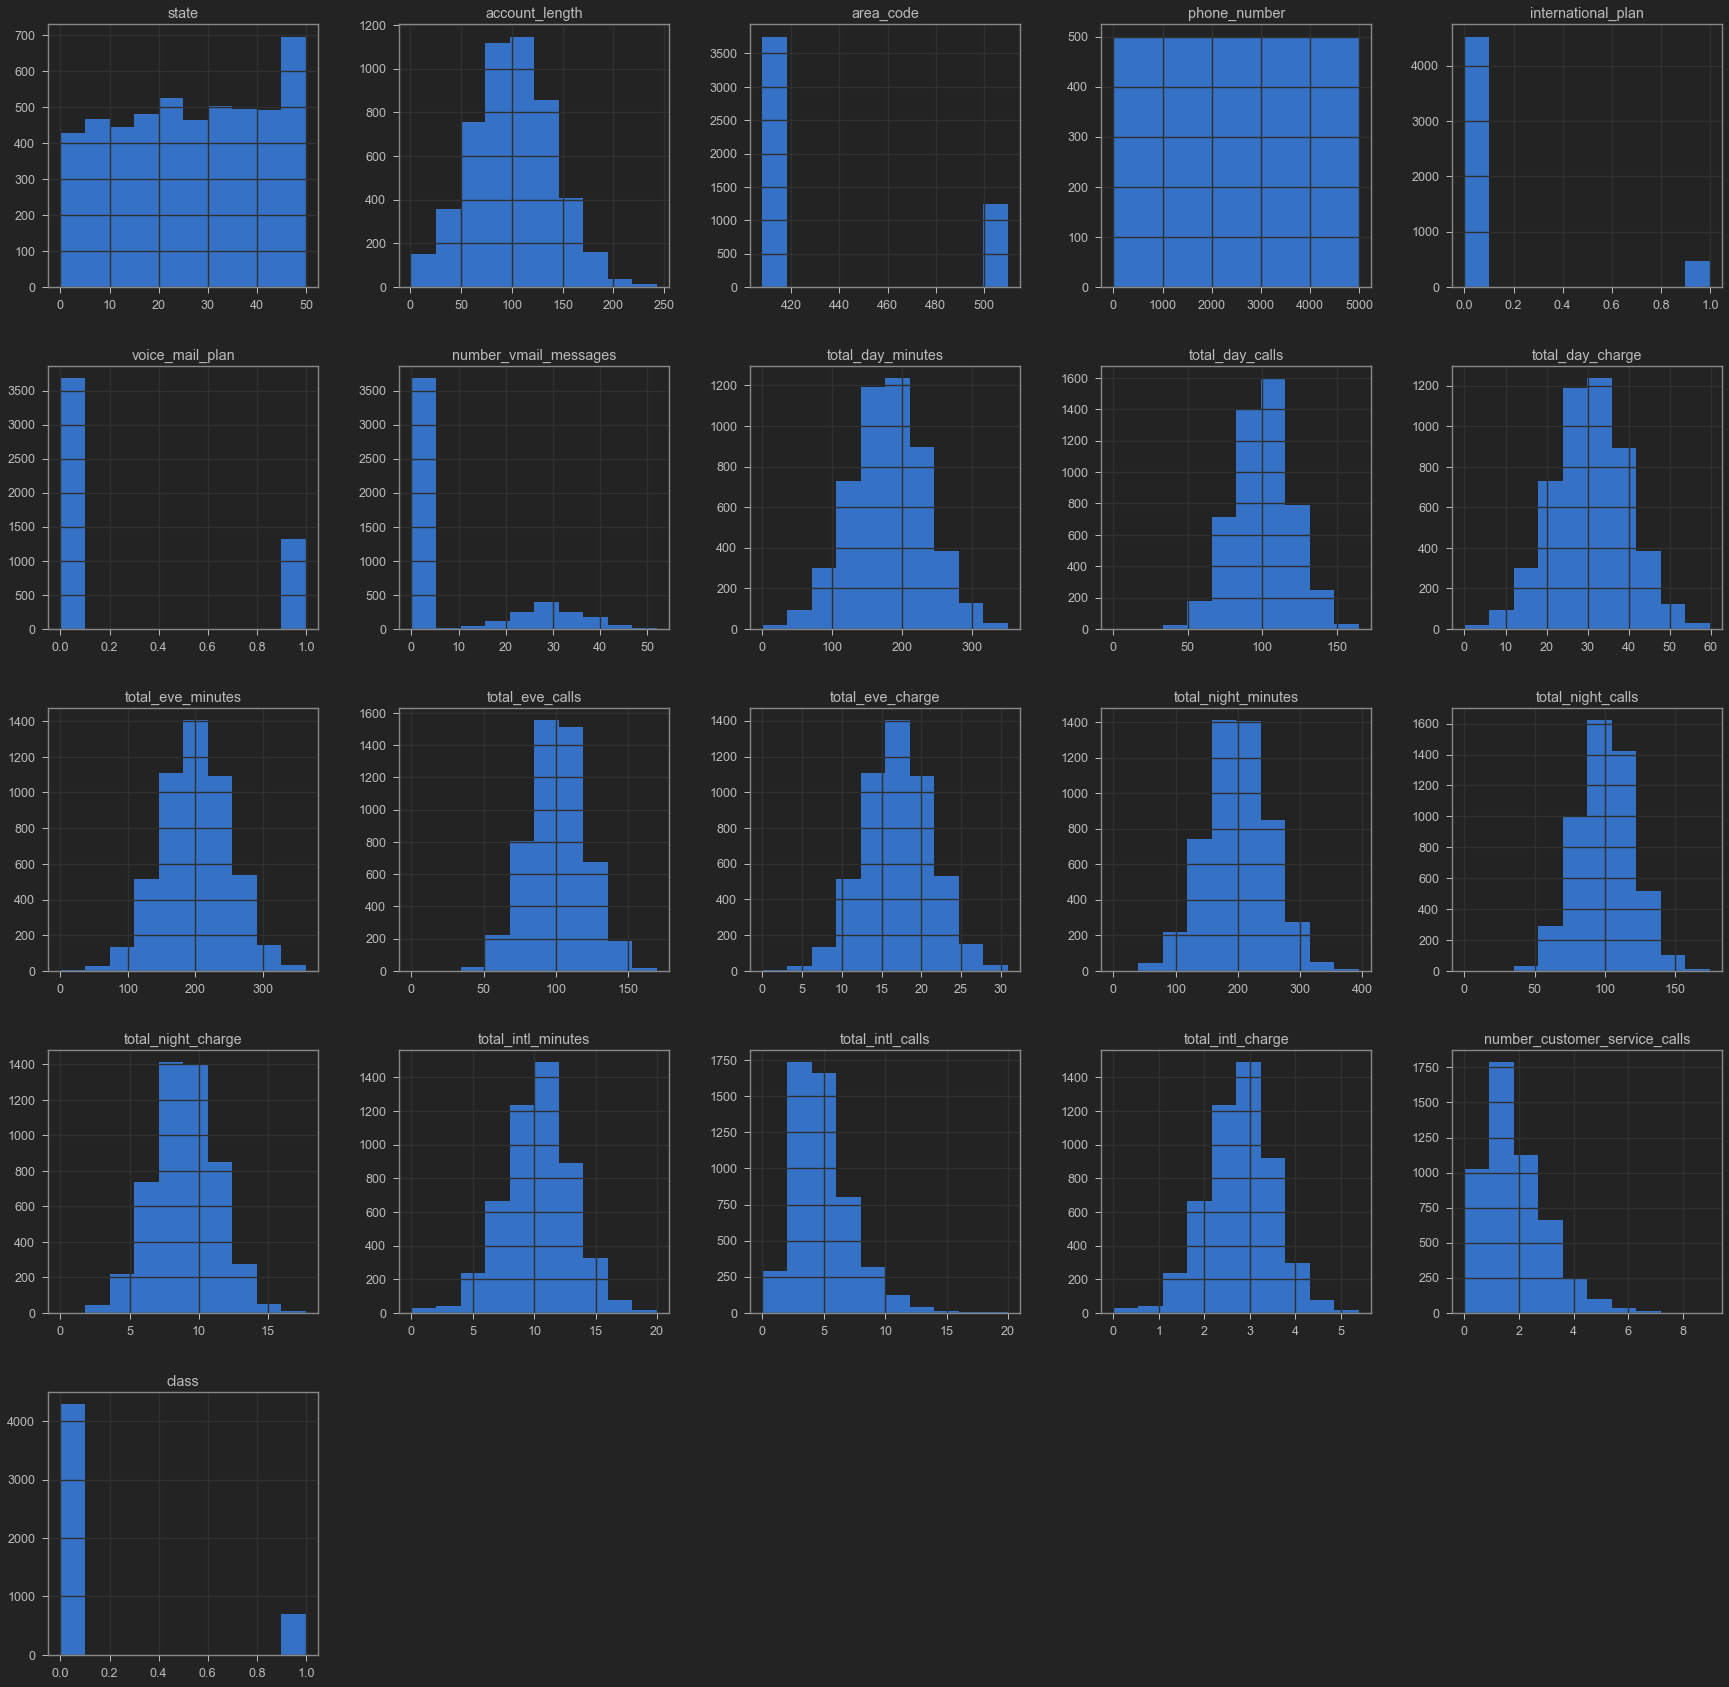

In [153]:
telecom_df.hist(figsize = (30,30))
plt.show()

In [154]:
telecom_df['class'].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [155]:
# Plot pie Chart to get the information about the percentage of Telecom Customers churning using Plotly histogram

import plotly.graph_objects as go
fig = go.Figure(data = [ go.Pie(labels = ['Retained (0)', 'Exited(1)'] , values =telecom_df['class'].value_counts())])
fig.show()

In [156]:
# Plot histogram graph for the international plan service used by the Telecom customers with respect to churned/Retained
fig = px.histogram(telecom_df, x = 'international_plan', color = 'class')
fig.show()


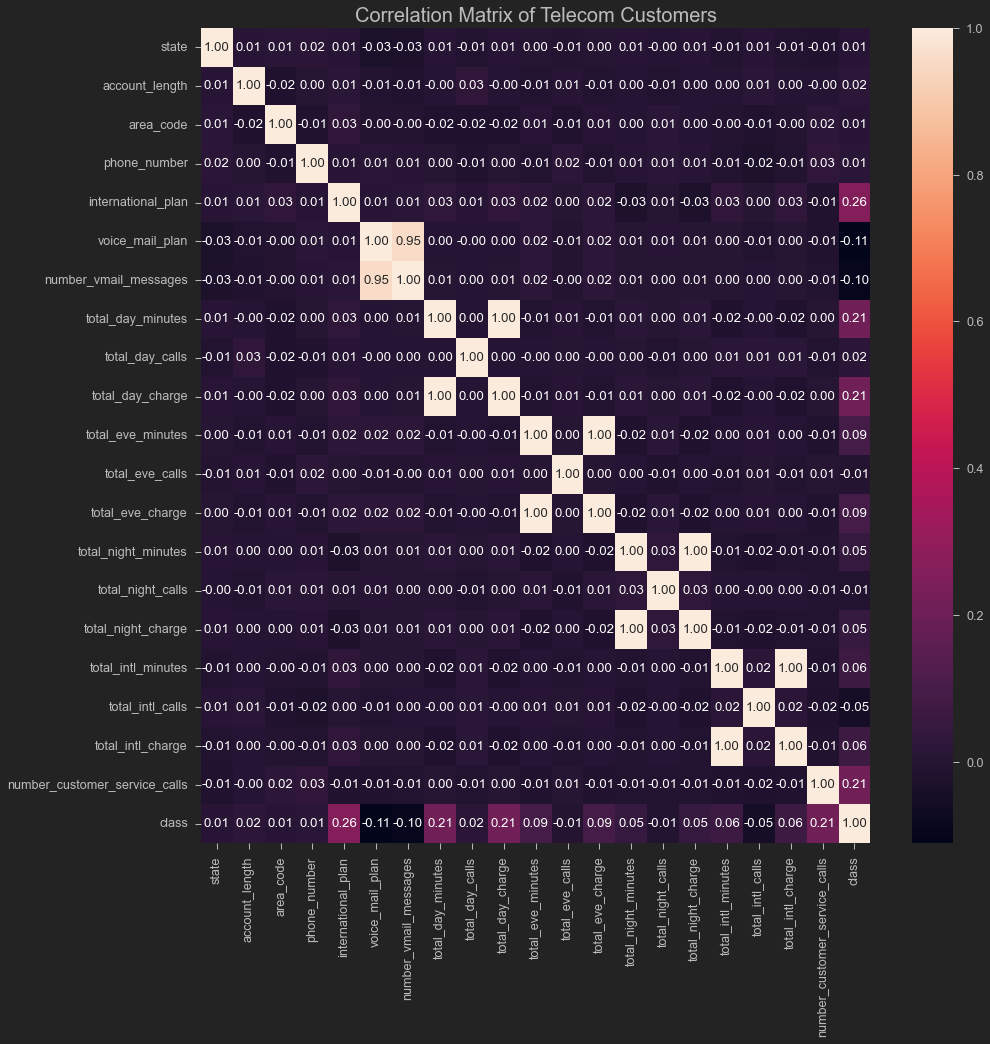

In [157]:
# Correlation Matrix

corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f')
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# We can clearly see that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# Also we can clearly see that "total day charge" and "total daily minutes" are highly correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

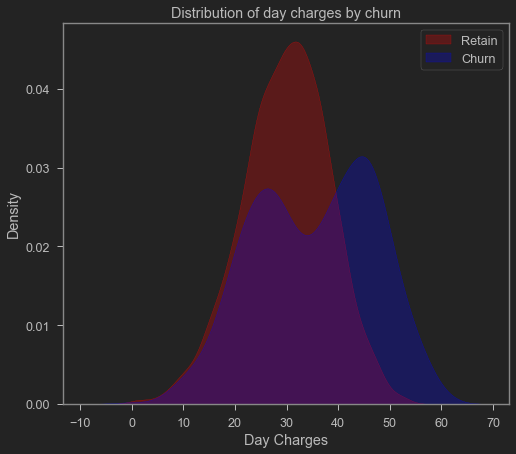

In [158]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

Text(0.5, 1.0, 'Distribution of evening charges by churn')

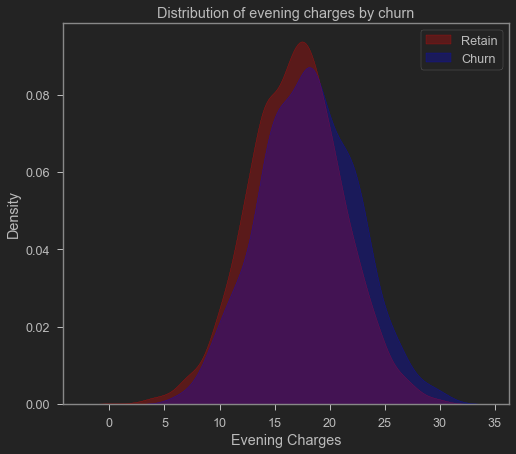

In [159]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

# IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING 

In [160]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data. 
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [161]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [162]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

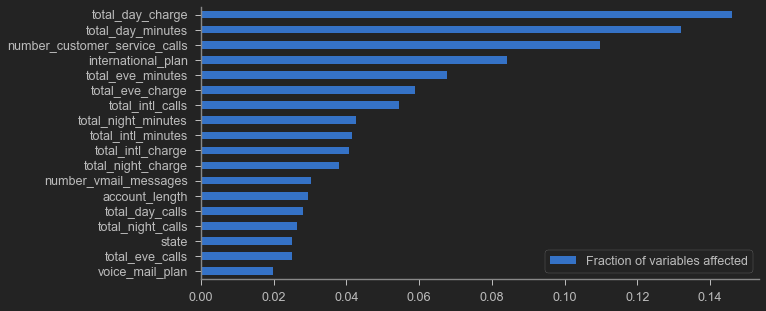

In [163]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [164]:
# The above graph is generated by Random Forest algorithm 
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# TRAINING AND EVALUATING LOGISTIC REGRESSION CLASSIFIER

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train , y_train)


C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [166]:
y_predict = model_LR.predict(X_test)

In [167]:
report = classification_report(y_test, y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.855087,0.988124,0.916804,842.000
1,0.629630,0.107595,0.183784,158.000
accuracy,0.849000,0.849000,0.849000,0.849
macro avg,0.742358,0.547859,0.550294,1000.000
weighted avg,0.819465,0.849000,0.800987,1000.000


<AxesSubplot:>

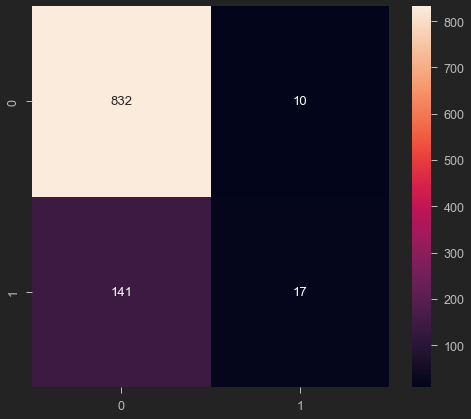

In [168]:
cm = confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot = True , fmt ='d')

In [169]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(f"Mean Squarred Error = {mean_squared_error(y_test, y_predict)}")


Mean Squarred Error = 0.151


In [170]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

print(f"Mean Absolute Error = {mean_absolute_error(y_test, y_predict)}")

Mean Absolute Error = 0.151


In [171]:
from sklearn.metrics import log_loss
pred = model_LR.predict_proba(X_test)
print(f"Binary Cross Entropy = {log_loss(y_test,pred)}")

Binary Cross Entropy = 0.37830228173438946


# TRAINING AND EVALUATING SUPPORT VECTOR MACHINE

In [172]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svm = LinearSVC(max_iter = 10000)
model_svm = CalibratedClassifierCV(model_svm)
model_svm.fit(X_train , y_train)

C:\Python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

C:\Python\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CalibratedClassifierCV(base_estimator=LinearSVC(max_iter=10000))

In [173]:
y_predict = model_svm.predict(X_test)

In [174]:
report = classification_report(y_test, y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.858325,0.985748,0.917634,842.000
1,0.636364,0.132911,0.219895,158.000
accuracy,0.851000,0.851000,0.851000,0.851
macro avg,0.747344,0.559330,0.568765,1000.000
weighted avg,0.823255,0.851000,0.807391,1000.000


<AxesSubplot:>

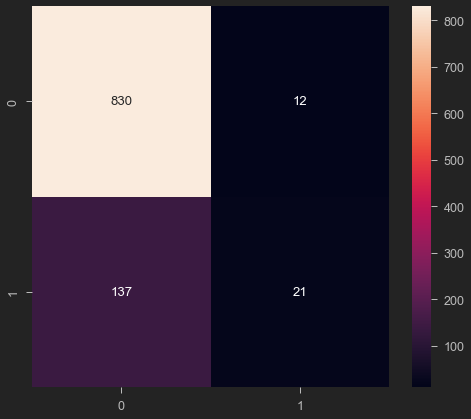

In [175]:
cm = confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot = True , fmt ='d')

In [176]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(f"Mean Squarred Error = {mean_squared_error(y_test, y_predict)}")


Mean Squarred Error = 0.149


In [177]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

print(f"Mean Absolute Error = {mean_absolute_error(y_test, y_predict)}")

Mean Absolute Error = 0.149


In [178]:
from sklearn.metrics import log_loss
pred = model_svm.predict_proba(X_test)
print(f"Binary Cross Entropy = {log_loss(y_test,pred)}")

Binary Cross Entropy = 0.3384084739137498


# TRAINING AND EVALUATING RANDOM FOREST CLASSIFIER

In [179]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train , y_train)

RandomForestClassifier()

In [180]:
y_predict = model_rf.predict(X_test)

In [181]:
report = classification_report(y_test, y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.953143,0.990499,0.971462,842.000
1,0.936000,0.740506,0.826855,158.000
accuracy,0.951000,0.951000,0.951000,0.951
macro avg,0.944571,0.865503,0.899158,1000.000
weighted avg,0.950434,0.951000,0.948614,1000.000


<AxesSubplot:>

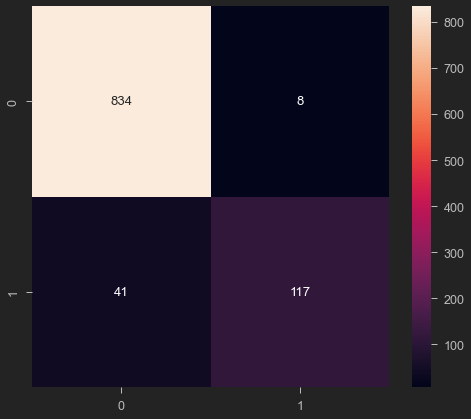

In [182]:
cm = confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot = True , fmt ='d')

In [183]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(f"Mean Squarred Error = {mean_squared_error(y_test, y_predict)}")


Mean Squarred Error = 0.049


In [184]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

print(f"Mean Absolute Error = {mean_absolute_error(y_test, y_predict)}")

Mean Absolute Error = 0.049


In [185]:
from sklearn.metrics import log_loss
pred = model_rf.predict_proba(X_test)
print(f"Binary Cross Entropy = {log_loss(y_test,pred)}")

Binary Cross Entropy = 0.29806732213509346


# TRAINING AND EVALUATING K-NEAREST NEIGHBOUR (KNN)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train , y_train)

KNeighborsClassifier()

In [187]:
y_predict = model_knn.predict(X_test)

In [188]:
report = classification_report(y_test, y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.873016,0.979810,0.923335,842.000
1,0.690909,0.240506,0.356808,158.000
accuracy,0.863000,0.863000,0.863000,0.863
macro avg,0.781962,0.610158,0.640071,1000.000
weighted avg,0.844243,0.863000,0.833824,1000.000


<AxesSubplot:>

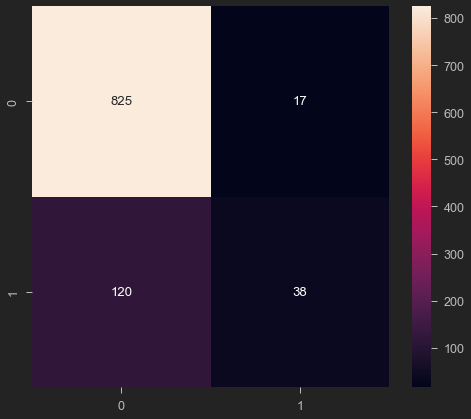

In [189]:
cm = confusion_matrix(y_test , y_predict)
sns.heatmap(cm , annot = True , fmt ='d')

In [190]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(f"Mean Squarred Error = {mean_squared_error(y_test, y_predict)}")


Mean Squarred Error = 0.137


In [191]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

print(f"Mean Absolute Error = {mean_absolute_error(y_test, y_predict)}")


Mean Absolute Error = 0.137


In [192]:
from sklearn.metrics import log_loss
pred = model_knn.predict_proba(X_test)
print(f"Binary Cross Entropy = {log_loss(y_test,pred)}")

Binary Cross Entropy = 2.167576606153634


# TRAINING AND EVALUATING A NAIVE BAYES CLASSIFIER

In [193]:
from sklearn.naive_bayes import GaussianNB

In [194]:
model_gnb = GaussianNB()
model_gnb.fit(X_train , y_train)

GaussianNB()

In [195]:
y_predict = model_gnb.predict(X_test)

In [196]:
report = classification_report(y_test, y_predict, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.916570,0.939430,0.927859,842.000
1,0.627737,0.544304,0.583051,158.000
accuracy,0.877000,0.877000,0.877000,0.877
macro avg,0.772154,0.741867,0.755455,1000.000
weighted avg,0.870935,0.877000,0.873380,1000.000


<AxesSubplot:>

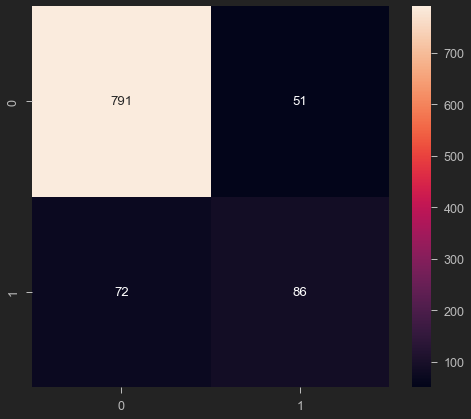

In [197]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt ='d')

In [198]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print(f"Mean Squarred Error = {mean_squared_error(y_test, y_predict)}")


Mean Squarred Error = 0.123


In [199]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error

print(f"Mean Absolute Error = {mean_absolute_error(y_test, y_predict)}")

Mean Absolute Error = 0.123


In [200]:
from sklearn.metrics import log_loss
pred = model_gnb.predict_proba(X_test)
print(f"Binary Cross Entropy = {log_loss(y_test,pred)}")

Binary Cross Entropy = 0.36756373997604647


# PLOTTING ROC CURVES AND DETERMINING AUC SCORES(ALL MODELS)

In [201]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [202]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7524279142487748
Support Vector Machine:  0.8415842328392314
Random Forest:  0.9295153191617307
K-Nearest Neighbors:  0.6857842989867403
Naive Bayes:  0.862007276225984


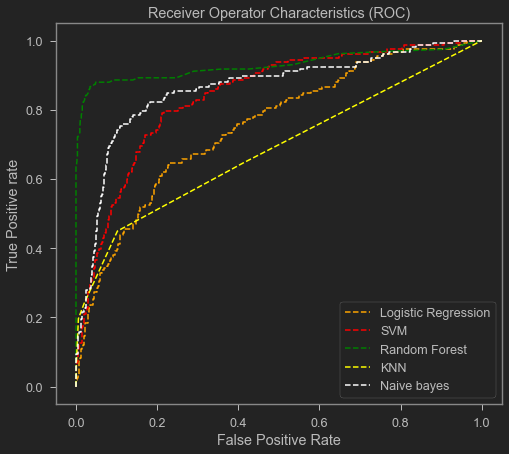

In [203]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.